In [47]:
import os
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from IPython.display import display

In [54]:
# ========================
# CONFIG
# ========================
model_path = "models/cats_vs_dogs_resnet18_50_epochs.pth" # model path
image_path = "test_images/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("The device being used:", device)

The device being used: cpu


In [49]:
# ========================
# PREPROCESSING
# ========================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])

In [50]:
# ========================
# LOAD MODEL
# ========================
model = models.resnet18(pretrained=True)   # change to model trained on (ex. resnet50)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)       # 2 classes (cat, dog)

model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

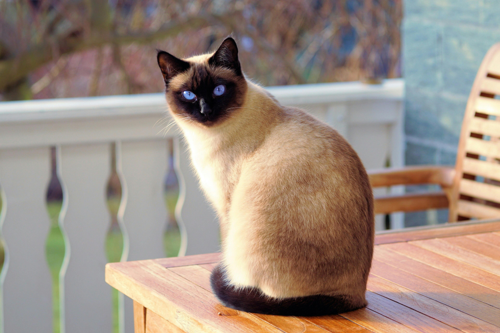

Prediction: cat


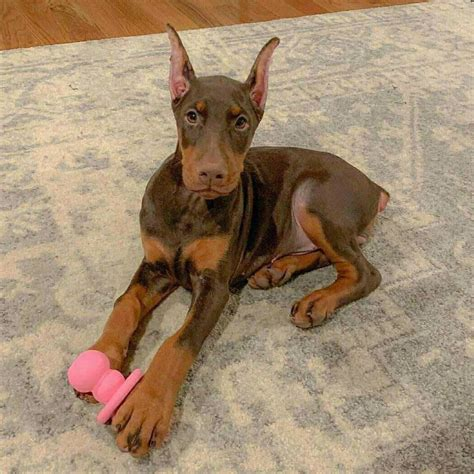

Prediction: dog


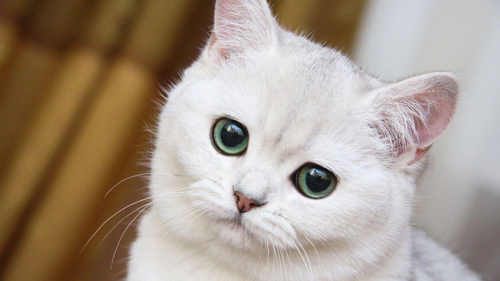

Prediction: cat


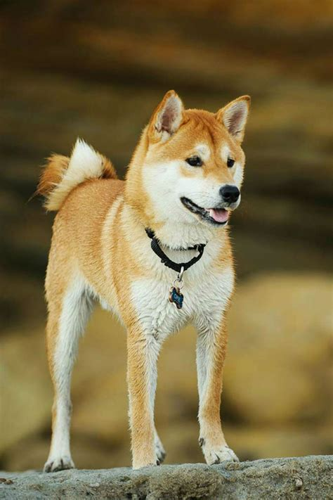

Prediction: dog


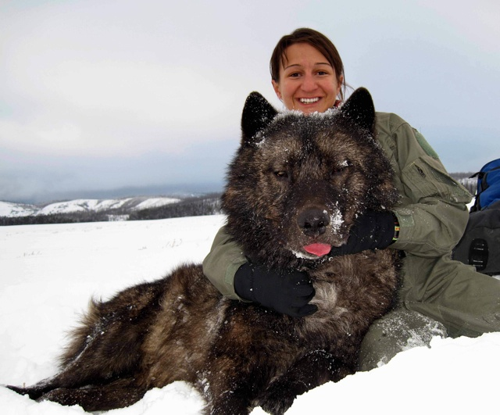

Prediction: dog


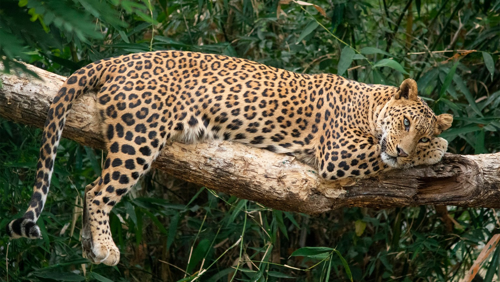

Prediction: cat


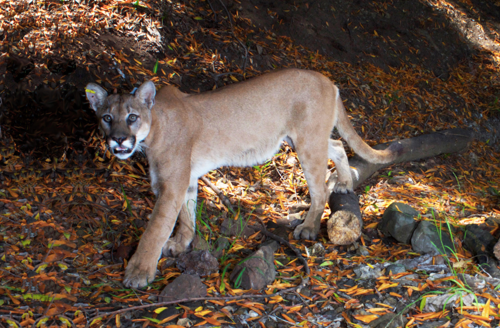

Prediction: dog


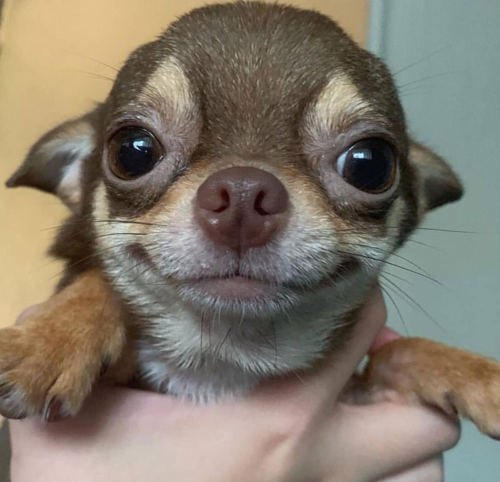

Prediction: dog


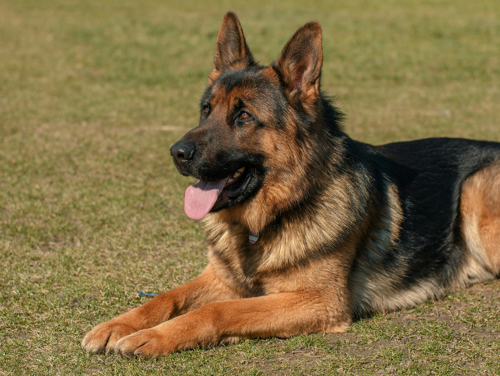

Prediction: dog


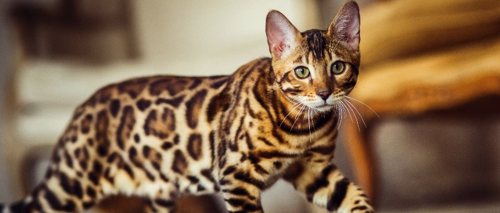

Prediction: cat


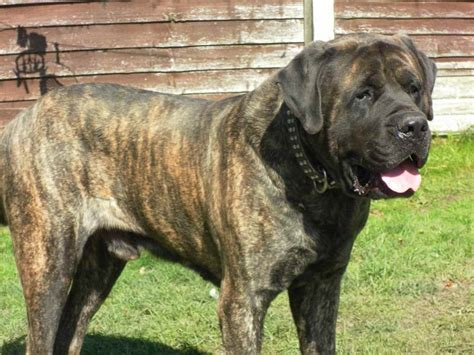

Prediction: dog


In [56]:
# ========================
# PREDICT
# ========================
classes = ["cat", "dog"]

for filename in os.listdir(image_path):

    full_path = os.path.join(image_path, filename) 
    img = Image.open(full_path).convert("RGB")
    im=Image.open(full_path)
    im.thumbnail((500, 500))
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        _, preds = torch.max(outputs, 1)

    classes = ["cat", "dog"]
    display(im)
    print(f"Prediction: {classes[preds.item()]}")